In [ ]:
#This file was built to analyse the output result files of https://github.com/merkisam/test-web-speech-api-de

#The following steps are applyed:
#1. Import of required libaries
#2. Creation of the comparsion List called (comparison)
#3. Loading of file list in dataPath (data)
#4. Creating of the resultArray for inserting the anaylsis result
#5. Iteration over each file
#5.1 Extraction of paramter: gender/age/isProvidedDictionary
#5.2 Enumeration over words in line
#5.2.1 Calculation of diffrent string distances and increasing count when over a certain treshold
#6. Insertion of result into Panda Dataframe and conversion to numeric values
#7. Separation of dataset by gender/age and isProvidedDictionary
#8. Combination of separated data sets
#9. Visualization of result

In [69]:
#1. Import of required libaries
from os import listdir
from os.path import isfile, join
import numpy as np
import nltk
import re

import pandas as pd
pd.set_option('mode.use_inf_as_na', True)
import warnings
warnings.filterwarnings('ignore')

#2. Creation of the comparsion List called (comparison)
comparisonCount = 0
comparison = [
    ["Lokalisation", "Haut", "des", "Kopfes"],
    ["Seitenangabe", "zum", "Präparat", "Links"],
    ["Gewebe", "Frisch"],
    ["Operationsverfahren", "Exzision"],
    ["Mitentfernte", "Strukturen", "Lymphknoten"],
    ["Grösse", "30", "x", "20", "x", "10", "Millimeter"],
    ["Orientierung", "des", "Präparats", "Fadenmarkierung,", "Medial", "Lateral"],
    ["Einbettung", "Kranial", "nach", "kaudal"],
    ["Veränderung", "Schnittfläche", "auffällig"],
    ["Schnittfläche", "Derb-Weiss"],
    ["Makroskopische", "Resektionsränder", "Kein", "Befall"],
    ["Komplette", "Einbettung", "Ja"],
]

for lidx, line in enumerate(comparison):
    comparisonCount += len(line)
print("wordCount: " + str(comparisonCount))
print(comparison[5][0])

#3. Loading of file list in dataPath (data)
dataPath = 'data'
fileList = np.array([f for f in listdir(dataPath) if isfile(join(dataPath, f))])

#4. Creating of the resultArray for inserting the anaylsis result
resultArr = [fileList, 
             np.full_like(fileList, ''), #gender
             np.full_like(fileList, ''), #young/old
             np.full_like(fileList, 0).astype(np.int), #isProvidedDictionary
             np.full_like(fileList, 0).astype(np.int), #wordCount
             np.full_like(fileList, 0).astype(np.int), #equalCount
             np.full_like(fileList, 0).astype(np.int), #preProz
             np.full_like(fileList, 0).astype(np.int), #levensteinDist < 3
             np.full_like(fileList, 0).astype(np.int), #JaroDist > 0.70
             np.full_like(fileList, 0).astype(np.int), #JaroDist > 0.75
             np.full_like(fileList, 0).astype(np.int), #JaroDist > 0.80
            ]

#5. Iteration over each file
for idx, fileName in enumerate(resultArr[0]):
    #print(fileName)
    file = open(dataPath + '/' + fileName, mode='r')
    fileCont = file.read().splitlines()
    
    for lidx, line in enumerate(fileCont):
        #5.1 Extraction of paramter: gender/age/isProvidedDictionary
        if(lidx == 0):
            #reading gender
            resultArr[1][idx] = fileCont[lidx]
        if(lidx == 1):
            #reading age
            resultArr[2][idx] = fileCont[lidx]
        if(lidx == 2):
            #reading isProvidedDictionary
            resultArr[3][idx] = fileCont[lidx]
        if(lidx > 3):
            #handle text-lines
            #Split by word
            lineParts = fileCont[lidx].strip().split(' ')
            resultArr[4][idx] += len(lineParts)
            #Iterate words
            if(len(comparison[lidx - 4]) != len(lineParts)):
                #printing all lines that were not comparable because of different word length
                print(comparison[lidx - 4])
                print(lineParts)
                print(resultArr[4][idx])
            #5.2.1 Calculation of diffrent string distances and increasing count when over a certain treshold 
            for widx, word in enumerate(lineParts):
                wordComp = comparison[lidx - 4][widx]
                #print(wordComp + " ?= " + word)
                if(wordComp == word):
                    resultArr[5][idx] = resultArr[5][idx] + 1
                word = re.sub('[^A-Za-z0-9]+', '', word).lower()
                wordComp = re.sub('[^A-Za-z0-9]+', '', wordComp).lower()
                if(wordComp == word):
                    resultArr[6][idx] = resultArr[6][idx] + 1
                if(nltk.distance.edit_distance(wordComp, word) < 3):
                    resultArr[7][idx] = resultArr[7][idx] + 1
                if(nltk.distance.jaro_winkler_similarity(wordComp, word) > 0.70):
                    resultArr[8][idx] = resultArr[8][idx] + 1
                if(nltk.distance.jaro_winkler_similarity(wordComp, word) > 0.75):
                    resultArr[9][idx] = resultArr[9][idx] + 1
                if(nltk.distance.jaro_winkler_similarity(wordComp, word) > 0.80):
                    resultArr[10][idx] = resultArr[10][idx] + 1
    file.close()
resultArr

wordCount: 44
Grösse


[array(['2022-04-06 10-29-17-final.txt', '2022-04-06 12-57-24-final.txt',
        '2022-04-08 18-03-30-final.txt', '2022-04-12 09-29-07-final.txt',
        '2022-04-14 14-59-45-final.txt', '2022-04-16 18-44-00-final.txt',
        '2022-04-17 13-16-32-final.txt', '2022-04-17 13-18-00-final.txt',
        '2022-04-17 13-21-22-final.txt', '2022-04-17 13-23-54-final.txt'],
       dtype='<U29'),
 array(['male', 'male', 'male', 'female', 'male', 'female', 'male',
        'female', 'male', 'female'], dtype='<U29'),
 array(['young', 'old', 'young', 'young', 'young', 'young', 'young', 'old',
        'old', 'young'], dtype='<U29'),
 array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1]),
 array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44]),
 array([21, 21, 19, 22, 16, 21, 19, 21, 18, 21]),
 array([33, 37, 30, 38, 30, 37, 33, 35, 34, 36]),
 array([39, 41, 36, 41, 33, 40, 34, 40, 36, 38]),
 array([42, 40, 41, 41, 36, 42, 36, 42, 37, 40]),
 array([41, 40, 38, 41, 36, 42, 36, 42, 37, 40]),
 array([37, 38, 35, 38, 33, 39,

In [70]:
#6. Insertion of result into Panda Dataframe and conversion to numeric values
resultNp = np.array(resultArr)
df = pd.DataFrame(resultNp.T, columns = ['File','Gender','Age', 'WithGlossar', 'WordCount', 'EqualCount', 'EqPreProz', 'Leven<3','JW0.70','JW0.75','JW0.80'])
df["old"] = (df["Age"] == 'old').astype(int)
df["young"] = (df["Age"] == 'young').astype(int)
df["female"] = (df["Gender"] == 'female').astype(int)
df["male"] = (df["Gender"] == 'male').astype(int)
df["WithGlossar"] = pd.to_numeric(df["WithGlossar"])
df["WordCount"] = 100 / 44 * pd.to_numeric(df["WordCount"])
df["EqualCount"] = 100 / 44 * pd.to_numeric(df["EqualCount"])
df["EqPreProz"] = 100 / 44 * pd.to_numeric(df["EqPreProz"])
df["Leven<3"] = 100 / 44 * pd.to_numeric(df["Leven<3"])
df["JW0.70"] = 100 / 44 * pd.to_numeric(df["JW0.70"])
df["JW0.75"] = 100 / 44 * pd.to_numeric(df["JW0.75"])
df["JW0.80"] = 100 / 44 * pd.to_numeric(df["JW0.80"])
df.describe()

,WithGlossar,WordCount,EqualCount,EqPreProz,Leven<3,JW0.70,JW0.75,JW0.80,old,young,female,male
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.500000,100.0,45.227273,77.954545,85.909091,90.227273,89.318182,82.727273,0.300000,0.700000,0.400000,0.600000
std,0.527046,0.0,4.211195,6.432706,6.586989,5.572174,5.362224,5.160420,0.483046,0.483046,0.516398,0.516398
min,0.000000,100.0,36.363636,68.181818,75.000000,81.818182,81.818182,75.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,100.0,43.181818,75.000000,81.818182,85.795455,84.659091,79.545455,0.000000,0.250000,0.000000,0.000000
50%,0.500000,100.0,47.727273,78.409091,87.500000,92.045455,90.909091,84.090909,0.000000,1.000000,0.000000,1.000000
75%,1.000000,100.0,47.727273,83.522727,90.909091,94.886364,93.181818,86.363636,0.750000,1.000000,1.000000,1.000000
max,1.000000,100.0,50.000000,86.363636,93.181818,95.454545,95.454545,88.636364,1.000000,1.000000,1.000000,1.000000


In [71]:
df.dtypes

File            object
Gender          object
Age             object
WithGlossar      int64
WordCount      float64
EqualCount     float64
EqPreProz      float64
Leven<3        float64
JW0.70         float64
JW0.75         float64
JW0.80         float64
old              int32
young            int32
female           int32
male             int32
dtype: object

In [72]:
dfNumber = df.select_dtypes(include=np.number)
dfNumber

,WithGlossar,WordCount,EqualCount,EqPreProz,Leven<3,JW0.70,JW0.75,JW0.80,old,young,female,male
0,1,100.0,47.727273,75.000000,88.636364,95.454545,93.181818,84.090909,0,1,0,1
1,0,100.0,47.727273,84.090909,93.181818,90.909091,90.909091,86.363636,1,0,0,1
2,0,100.0,43.181818,68.181818,81.818182,93.181818,86.363636,79.545455,0,1,0,1
3,1,100.0,50.000000,86.363636,93.181818,93.181818,93.181818,86.363636,0,1,1,0
4,0,100.0,36.363636,68.181818,75.000000,81.818182,81.818182,75.000000,0,1,0,1
5,1,100.0,47.727273,84.090909,90.909091,95.454545,95.454545,88.636364,0,1,1,0
6,0,100.0,43.181818,75.000000,77.272727,81.818182,81.818182,75.000000,0,1,0,1
7,1,100.0,47.727273,79.545455,90.909091,95.454545,95.454545,88.636364,1,0,1,0
8,0,100.0,40.909091,77.272727,81.818182,84.090909,84.090909,79.545455,1,0,0,1
9,1,100.0,47.727273,81.818182,86.363636,90.909091,90.909091,84.090909,0,1,1,0


<AxesSubplot:>

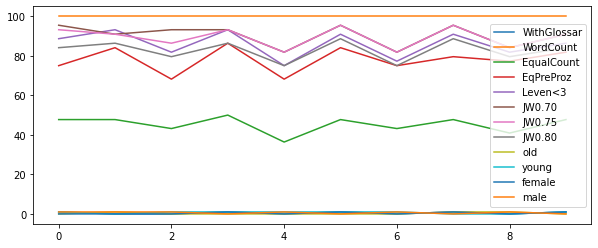

In [73]:
dfNumber.plot(figsize=(10,4))

<AxesSubplot:>

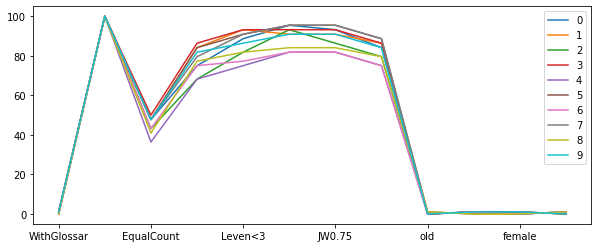

In [75]:
dfNumber.T.plot(figsize=(10,4))

<AxesSubplot:>

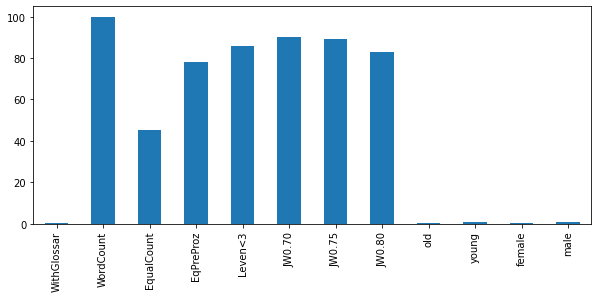

In [76]:
df.mean().plot(kind='bar', figsize=(10,4))

<AxesSubplot:>

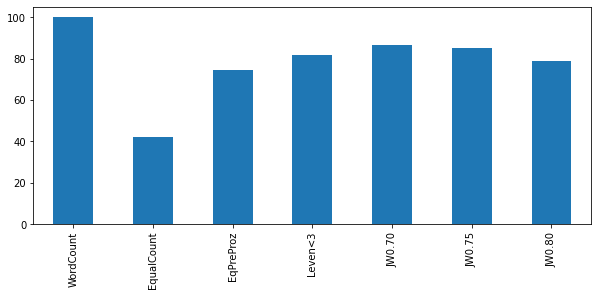

In [81]:
#7. Separation of dataset by gender/age and isProvidedDictionary
dfNumberWithout = dfNumber[dfNumber['WithGlossar'] == 0]
dfNumberWithout.describe()
dfNumberWithout[["WordCount", "EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean().plot(kind='bar', figsize=(10,4))

<AxesSubplot:>

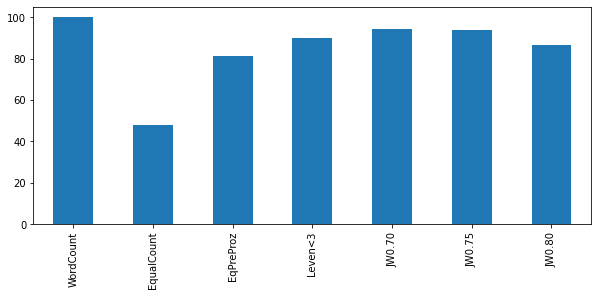

In [82]:
#7. Separation of dataset by gender/age and isProvidedDictionary
dfNumberWith = dfNumber[dfNumber['WithGlossar'] == 1]
dfNumberWith.describe()
dfNumberWith[["WordCount", "EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean().plot(kind='bar', figsize=(10,4))

<AxesSubplot:>

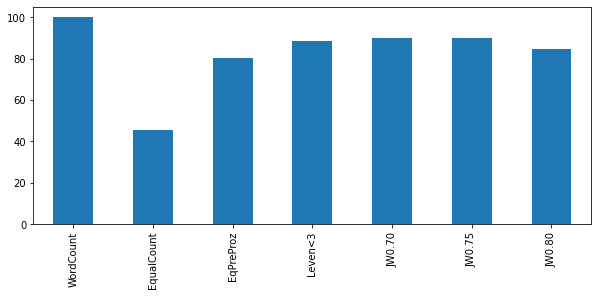

In [83]:
#7. Separation of dataset by gender/age and isProvidedDictionary
dfOld = dfNumber[dfNumber['old'] == 1]
dfOld.describe()
dfOld[["WordCount", "EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean().plot(kind='bar', figsize=(10,4))

<AxesSubplot:>

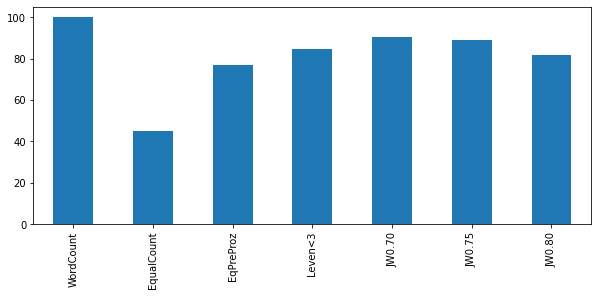

In [85]:
#7. Separation of dataset by gender/age and isProvidedDictionary
dfYoung = dfNumber[dfNumber['old'] == 0]
dfYoung.describe()
dfYoung[["WordCount", "EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean().plot(kind='bar', figsize=(10,4))

<AxesSubplot:>

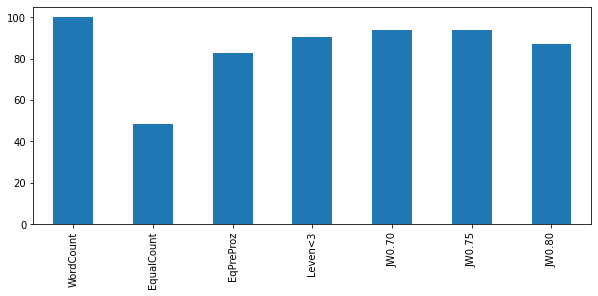

In [86]:
#7. Separation of dataset by gender/age and isProvidedDictionary
dfFemale = dfNumber[dfNumber['male'] == 0]
dfFemale.describe()
dfFemale[["WordCount", "EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean().plot(kind='bar', figsize=(10,4))

<AxesSubplot:>

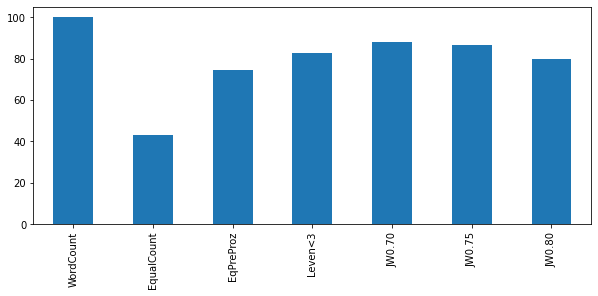

In [87]:
#7. Separation of dataset by gender/age and isProvidedDictionary
dfMale = dfNumber[dfNumber['male'] == 1]
dfMale.describe()
dfMale[["WordCount", "EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean().plot(kind='bar', figsize=(10,4))

In [107]:
#8. Combination of separated data sets
groups = np.array([
    dfNumberWithout[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean(),
    dfNumberWith[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean(),
    dfFemale[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean(),
    dfMale[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean(),
    dfYoung[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean(),
    dfOld[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].mean(),
])
df2 = pd.DataFrame(groups.T, columns = ['WithoutGlossar','WithGlossar','Female','Male','Young','Older'], index=["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"])
df2

,WithoutGlossar,WithGlossar,Female,Male,Young,Older
EqualCount,42.272727,48.181818,48.295455,43.181818,45.129870,45.454545
EqPreProz,74.545455,81.363636,82.954545,74.621212,76.948052,80.303030
Leven<3,81.818182,90.000000,90.340909,82.954545,84.740260,88.636364
JW0.70,86.363636,94.090909,93.750000,87.878788,90.259740,90.151515
JW0.75,85.000000,93.636364,93.750000,86.363636,88.961039,90.151515
JW0.80,79.090909,86.363636,86.931818,79.924242,81.818182,84.848485


<AxesSubplot:title={'center':'Matching Words in Percent by Algorithm'}>

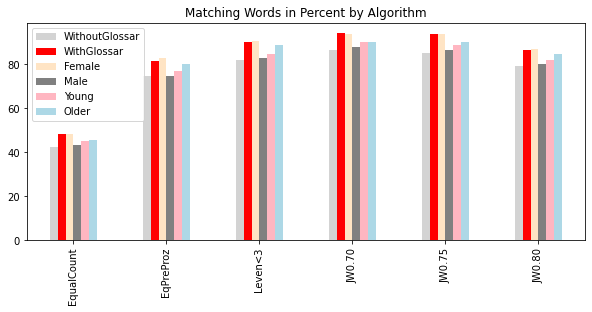

In [108]:
#9. Visualization of result
df2.plot(kind='bar', title="Matching Words in Percent by Algorithm", color=['lightgray', 'red', 'bisque', 'gray', 'lightpink', 'lightblue'], figsize=(10,4))

In [99]:
#8. Combination of separated data sets
groups = np.array([
    dfNumberWithout[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].median(),
    dfNumberWith[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].median(),
    dfFemale[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].median(),
    dfMale[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].median(),
    dfYoung[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].median(),
    dfOld[["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"]].median(),
])
df3 = pd.DataFrame(groups.T, columns = ['WithoutGlossar','WithGlossar','Female','Male','Young','Old'], index=["EqualCount", 'EqPreProz', "Leven<3", "JW0.70", "JW0.75", "JW0.80"])
df3

,WithoutGlossar,WithGlossar,Female,Male,Young,Old
EqualCount,43.181818,47.727273,47.727273,43.181818,47.727273,47.727273
EqPreProz,75.000000,81.818182,82.954545,75.000000,75.000000,79.545455
Leven<3,81.818182,90.909091,90.909091,81.818182,86.363636,90.909091
JW0.70,84.090909,95.454545,94.318182,87.500000,93.181818,90.909091
JW0.75,84.090909,93.181818,94.318182,85.227273,90.909091,90.909091
JW0.80,79.545455,86.363636,87.500000,79.545455,84.090909,86.363636


<AxesSubplot:title={'center':'Matching Words in Percent by Algorithm'}>

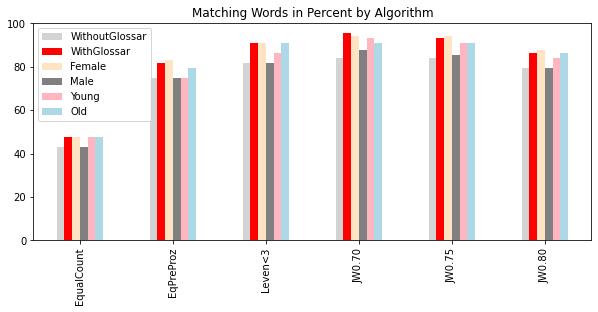

In [100]:
#9. Visualization of result
df3.plot(kind='bar', title="Matching Words in Percent by Algorithm", color=['lightgray', 'red', 'bisque', 'gray', 'lightpink', 'lightblue'], figsize=(10,4))